## Brute Force search #1

{'Pearlescent Blue': {'rgb': [0.3137254901960784, 0.5058823529411764, 0.6901960784313725], 'alpha': np.float64(0.04998931898973191)}, 'Perfect Orange': {'rgb': [0.9490196078431372, 0.45098039215686275, 0.19215686274509805], 'alpha': np.float64(0.06449301496838222)}, 'Gun Metal Gray': {'rgb': [0.30980392156862746, 0.33725490196078434, 0.35294117647058826], 'alpha': np.float64(0.24852270692471412)}, 'Turquoise': {'rgb': [0.06274509803921569, 0.6, 0.5803921568627451], 'alpha': np.float64(0.18126924692201818)}, 'Hi-Flow Light Gray': {'rgb': [0.6470588235294118, 0.6509803921568628, 0.6392156862745098], 'alpha': np.float64(0.3296799539643607)}, 'Amethyst Violet': {'rgb': [0.5882352941176471, 0.27058823529411763, 0.48627450980392156], 'alpha': np.float64(0.004301068623984494)}}
2 34
2 29
2 17
2 8
3 4
2 32
2 28
2 21
2 12
2 4
3 5
2 27
2 22
2 17
2 12
2 4
3 5
2 21
2 15
2 10
2 4
3 4
2 13
2 8
2 2
3 3
2 5
3 1
4 6
2 33
2 30
2 19
2 9
2 1
3 5
2 33
2 29
2 25
2 18
2 9
2 1
3 6
2 29
2 25
2 21
2 16
2 11
2 5

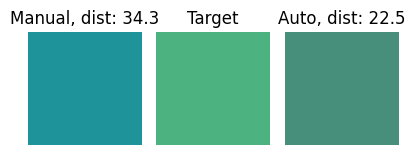

['Pearlescent Blue', 'Pearlescent Blue', 'Pearlescent Blue', 'Turquoise', 'Turquoise']


C:\Users\Matyanson\AppData\Local\Temp\ipykernel_12808\2080209645.py:142: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle(


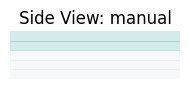

['Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect 

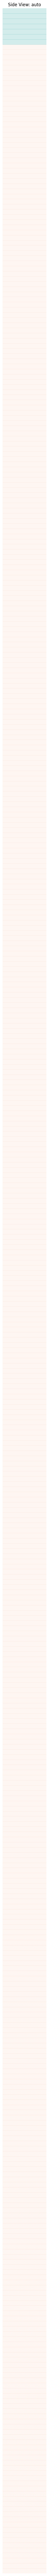

In [14]:
import numpy as np
from skimage import color
import matplotlib.pyplot as plt

# --- UTILITY FUNCTIONS ---
def clamp(lb, ub, val):
    return min(max(lb, val), ub)

def rgb_to_lab(rgb):
    rgb = np.array(rgb).reshape(1, 1, 3)
    lab = color.rgb2lab(rgb)
    return lab[0, 0]

def lab_to_rgb(lab):
    lab = np.array(lab).reshape(1, 1, 3)
    rgb = color.lab2rgb(lab)
    return rgb[0, 0]

def alpha_from_td(thickness, td):
    """
    Convert thickness (mm) and transmission distance (mm) to an opacity:
      alpha = 1 - exp(-thickness / td)
    """
    return 1 - np.exp(-thickness / td)

def composite_over(base_rgb, top_rgb, top_alpha):
    base_rgb = np.array(base_rgb, dtype=np.float64)
    top_rgb = np.array(top_rgb, dtype=np.float64)

    return top_alpha * top_rgb + (1 - top_alpha) * base_rgb

def color_distance(rgb1, rgb2):
    rgb1 = np.array(rgb1).reshape(1, 1, 3)
    rgb2 = np.array(rgb2).reshape(1, 1, 3)
    lab1 = color.rgb2lab(rgb1)
    lab2 = color.rgb2lab(rgb2)

    # Euclidean distance in LAB space
    return np.linalg.norm(lab1 - lab2)


# --- GLOBAL ---
filaments = {
    'Pearlescent Blue': {
        'rgb': [0.3137254901960784, 0.5058823529411764, 0.6901960784313725],
        'td': 3.9,   # Transmission Distance in mm
    },
    'Perfect Orange': {
        'rgb': [0.9490196078431372, 0.45098039215686275, 0.19215686274509805],
        'td': 3.0,
    },
    'Gun Metal Gray': {
        'rgb': [0.30980392156862746, 0.33725490196078434, 0.35294117647058826],
        'td': 0.7,
    },
    'Turquoise': {
        'rgb': [0.06274509803921569, 0.6, 0.5803921568627451],
        'td': 1.0,
    },
    'Hi-Flow Light Gray': {
        'rgb': [0.6470588235294118, 0.6509803921568628, 0.6392156862745098],
        'td': 0.5,
    },
    'Amethyst Violet': {
        'rgb': [0.5882352941176471, 0.27058823529411763, 0.48627450980392156],
        'td': 46.4,
    },
}

layer_thickness = 0.2  # mm per layer
base_color = [0.0, 0.0, 0.0] # [0.5, 0.5, 0.5]  # white background
target_color = [0.0, 0.5, 0.5]  # custom teal
target_color = [0.3, 0.7, 0.5]


# --- SETUP ---
colors = {} # {"rgb", "alpha"}
for f_name, f in filaments.items():
    rgb = f['rgb']
    td = f['td']
    alpha = alpha_from_td(layer_thickness, td)
    colors[f_name] = {
        "rgb": rgb,
        "alpha": alpha
    }

print(colors)

# 6) Blend layer by layer using TD-based alpha
def blend_layers(layers):
    current_rgb = np.array(base_color, dtype=float)
    for i, name in enumerate(layers, start=1):
        rgb = np.array(colors[name]['rgb'], dtype=float)
        alpha = colors[name]['alpha']
        current_rgb = composite_over(current_rgb, rgb, alpha)

    return current_rgb


def blend_layers_alpha(layers):
    current_rgb = np.array([0.0, 0.0, 0.0], dtype=float)
    current_alpha = 0.0

    for name in layers:
        rgb = np.array(colors[name]['rgb'], dtype=float)
        alpha = float(colors[name]['alpha'])

        current_rgb = rgb * alpha + current_rgb * (1 - alpha)
        current_alpha = alpha + current_alpha * (1 - alpha)
    
    return [current_rgb / current_alpha, current_alpha]

# 7) Show a side-by-side comparison of blended vs. target
def print_comparasion(rgb1, rgb2):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(4, 2))
    dist1 = round(color_distance(rgb1, target_color), 2)
    ax1.imshow(np.ones((10,10,3)) * rgb1.reshape((1,1,3)))
    ax1.set_title(f"Manual, dist: {dist1}")

    ax2.imshow(np.ones((10,10,3)) * np.array(target_color).reshape((1,1,3)))
    ax2.set_title("Target")
    
    dist2 = round(color_distance(rgb2, target_color), 2)
    ax3.imshow(np.ones((10,10,3)) * rgb2.reshape((1,1,3)))
    ax3.set_title(f"Auto, dist: {dist2}")

    for ax in (ax1, ax2, ax3):
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# 8) Visualize each layer from the side with uniform thickness
def visualize_stack(stack, title):
    print(stack)
    total_thickness = layer_thickness * len(stack)
    fig2, ax2 = plt.subplots(figsize=(2, total_thickness))
    y_bottom = 0
    for i, name in enumerate(stack, start=1):
        rgb = colors[name]['rgb']
        alpha = colors[name]['alpha']
        rect = plt.Rectangle(
            (0, y_bottom), 1, layer_thickness,
            color=(rgb[0], rgb[1], rgb[2], alpha),
            edgecolor='black',
            linewidth=0.5
        )
        ax2.add_patch(rect)
        y_bottom += layer_thickness

    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, total_thickness)
    ax2.set_aspect('auto')
    ax2.axis('off')
    ax2.set_title(title)

    plt.tight_layout()
    plt.show()


# thickness in number of layers
def max_color_thickness(c_name, stack):
    stack = list(stack) + [c_name]

    color_dist, closest_dist, center_dist = get_stack_potential(stack)

    i = 0
    while(closest_dist == 0 and i < 50):
        stack.append(c_name)
        color_dist, closest_dist, center_dist = get_stack_potential(stack)
        i += 1
    
    return i


def dynamic_stack_to_stack(dynamic_stack):
    stack = []
    for c in dynamic_stack:
        count = c['count']
        name = c['name']
        stack = stack + [name] * count

    return stack



def get_dynamic_stack_score(dynamic_stack):
    stack = dynamic_stack_to_stack(dynamic_stack)
    color_dist, closest_dist = get_stack_potential(stack)
    return color_dist, closest_dist

def get_stack(max_layers):
    curr_stack = []
    best_color_dist = 10000

    # get base color distance
    for c_name, c in colors.items():
        get_stack_potential([c_name])
        rgb = c['rgb']
        color_dist = color_distance(rgb, target_color)

        if(color_dist < best_color_dist):
            best_color_dist = color_dist
            curr_stack = [c_name]
    
    # sort colors to how close they are to the target
    def color_score(c):
        rgb = colors[c]['rgb']
        score = color_distance(rgb, target_color)
        return score
    
    color_pool = list(colors.keys())
    color_pool.sort(key=color_score, reverse=True)

    # create dynamic stack
    dynamic_stack = []
    for c in color_pool:
        dynamic_stack.append(
            {
                "name": c,
                "count": 0
            }
        )


    # itterate the dynamic_stack untill all counters are reset
    itterated = True
    while(itterated):
        # increment by one
        itterated = False
        for i in range(len(dynamic_stack)):
            dynamic_stack[i]['count'] += 1
            
            stack = dynamic_stack_to_stack(dynamic_stack)
            color_dist, closest_dist = get_stack_potential(stack)

            # print("stack", dynamic_stack)

            if(color_dist < best_color_dist):
                best_color_dist = color_dist
                curr_stack = stack
                itterated = True
                break

            if(closest_dist < best_color_dist):
                itterated = True
                break

            else:
                if(i > 1):
                    print(i, dynamic_stack[i]['count'])
                dynamic_stack[i]['count'] = 0
    
    
    return curr_stack
            
            
    


def get_stack_potential(stack):

    rgb, alpha = blend_layers_alpha(stack)

    min_color = composite_over([0.0, 0.0, 0.0], rgb, alpha)
    max_color = composite_over([1.0, 1.0, 1.0], rgb, alpha)

    center_color = [
        (min_color[0] + max_color[0]) * 0.5,
        (min_color[1] + max_color[1]) * 0.5,
        (min_color[2] + max_color[2]) * 0.5,
    ]


    center_dist = color_distance(center_color, target_color)

    # changed rgb to: rgb * alpha !!!
    color_dist = color_distance(rgb * alpha, target_color)

    closest_color = [
        clamp(min_color[0], max_color[0], target_color[0]),
        clamp(min_color[1], max_color[1], target_color[1]),
        clamp(min_color[2], max_color[2], target_color[2]),
    ]
    closest_dist = color_distance(closest_color, target_color)

    # if target color is inside the prism, return - distance to the closest wall
    if(closest_dist == 0.0):
        closest_dist = - min(
            target_color[0] - min_color[0], target_color[1] - min_color[1], target_color[2] - min_color[2],
            max_color[0] - target_color[0], max_color[1] - target_color[1], max_color[2] - target_color[2],
        )

    

    return [color_dist, closest_dist]








# --- DO STUFF ---



stack_manual = ['Pearlescent Blue'] * 3 + ['Turquoise'] * 2
stack_auto = get_stack(100)

blended_manual, alpha = blend_layers_alpha(stack_manual)
blended_auto_rgb, alpha = blend_layers_alpha(stack_auto)
print(len(stack_auto))

print_comparasion(blended_manual, blended_auto_rgb)

visualize_stack(stack_manual, "Side View: manual")
visualize_stack(stack_auto, "Side View: auto")